<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/Time-series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uploading the csv file to colab

!pip install wget

!python -m wget -o elecequip.csv http://www.donlapark.cmustat.com/229351/data/elecequip.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=25d329c251f96f91392ea6289b3b38759d7054314663da7c480bc29005645b29
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under elecequip.csv


In [ ]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'], 
                                        index_col='time',
                                        date_parser=parser)

print (data.head())

print (data.dtypes)

            Unnamed: 0  value
time                         
1996-01-01           1  79.35
1996-02-01           2  75.78
1996-03-01           3  86.32
1996-04-01           4  72.60
1996-05-01           5  74.86
Unnamed: 0      int64
value         float64
dtype: object


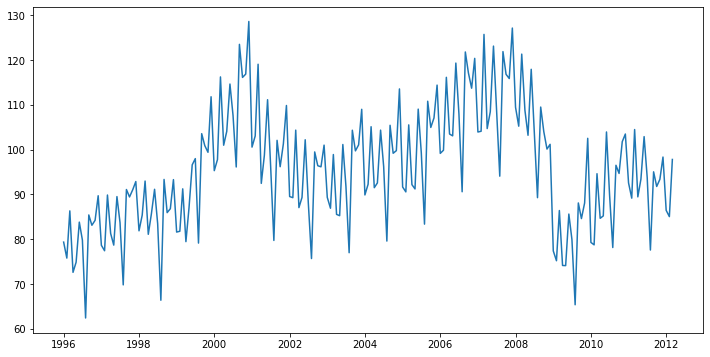

In [ ]:
plt.figure(figsize=(12,6)) # picture size
plt.plot(data["value"]);

#Moving average

In [ ]:
data['MA'] = data['value'].rolling(window=5,center=True).mean() # odd
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1) #even

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


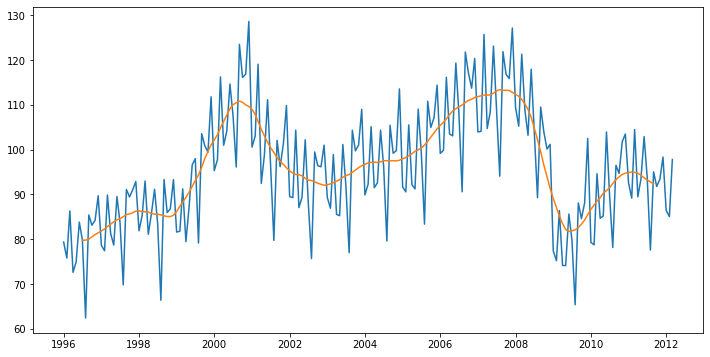

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

#Classical decomposition

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


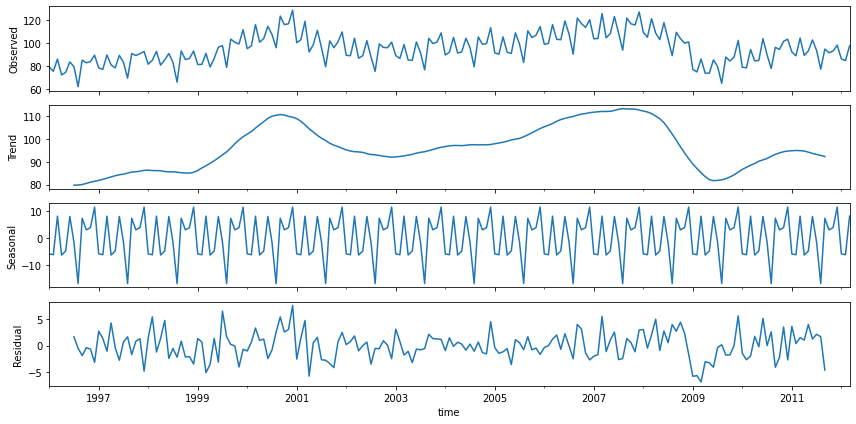

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive')

result_add.plot();

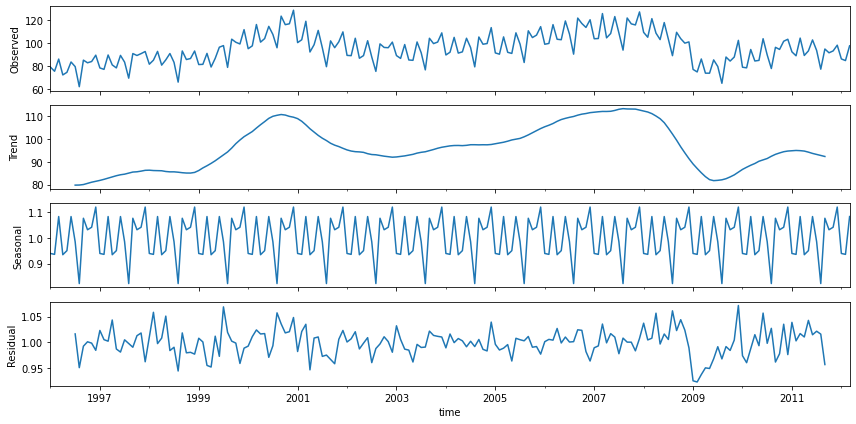

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

###เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: value, Length: 195, dtype: float64
time
1996-01-01    -5.887662
1996-02-01    -6.199273
1996-03-01     8.083171
1996-04-01    -6.314968
1996-05-01    -4.818468
                ...    
2011-11-01     3.847366
2011-12-01    11.447504
2012-01-01    -5.887662
2012-02-01    -6.199273
2012-03-01     8.083171
Name: value, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: value, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.44
2012-02-01    85.04
2012-03-01    97.80

#Exponential smoothing

In [ ]:
ts = data['value']

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

fit1 = SimpleExpSmoothing(ts).fit()

#ดูค่า l_0 (initial level) และ alpha (smoothing parameter)
print("l_0: ",fit1.model.params['initial_level']) #l_0
print("alpha: ", fit1.model.params['smoothing_level']) #alpha

l_0:  78.7837106227868
alpha:  0.2536094944588913


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### `fit.forecast` สำหรับการทำนายข้อมูลในอนาคต

In [ ]:
fcast1 = fit1.forecast(12).rename(r'$\alpha=%s$'%fit1.model.params['smoothing_level'])

fcast1

2012-04-01    92.159778
2012-05-01    92.159778
2012-06-01    92.159778
2012-07-01    92.159778
2012-08-01    92.159778
2012-09-01    92.159778
2012-10-01    92.159778
2012-11-01    92.159778
2012-12-01    92.159778
2013-01-01    92.159778
2013-02-01    92.159778
2013-03-01    92.159778
Freq: MS, Name: $\alpha=0.2536094944588913$, dtype: float64

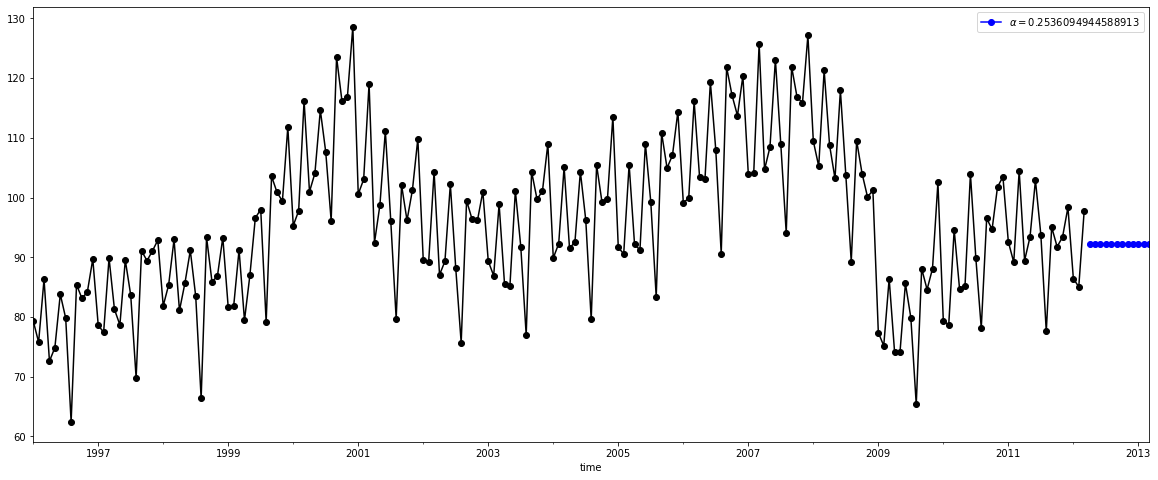

In [ ]:
ax = ts.plot(marker='o', color='black', figsize=(20,8))

fcast1.plot(marker='o', color='blue', ax=ax, legend=True);

###`fit.fittedvalues` เพื่อทำนายเทียบกับค่าที่แท้จริง

In [ ]:
fitted1 = fit1.fittedvalues
print(fitted1)

time
1996-01-01    78.783711
1996-02-01    78.927327
1996-03-01    78.129135
1996-04-01    80.206416
1996-05-01    78.277357
                ...    
2011-11-01    92.066691
2011-12-01    92.397223
2012-01-01    93.904367
2012-02-01    92.011333
2012-03-01    90.243337
Length: 195, dtype: float64


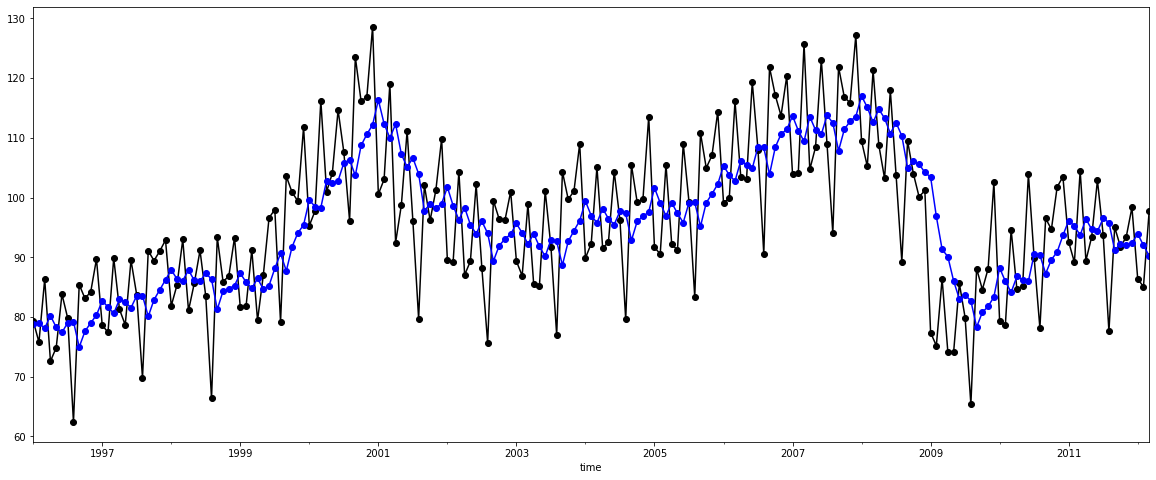

In [ ]:
ax = ts.plot(marker='o', color='black', figsize=(20,8))

fitted1.plot(marker='o', ax=ax, color='blue');

###เราสามารถกำหนดค่า $\alpha$ เองได้

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


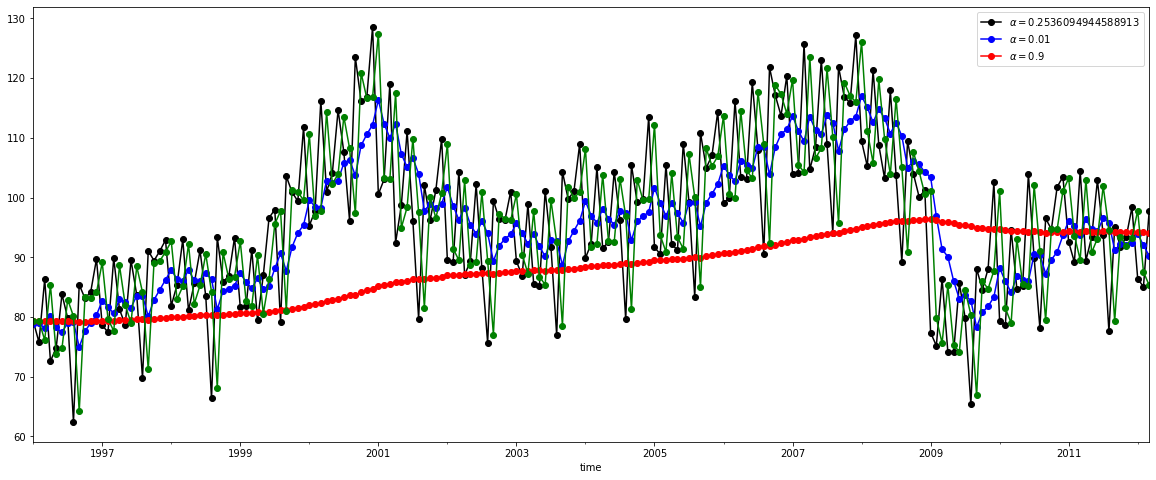

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

fit2 = SimpleExpSmoothing(ts).fit(smoothing_level=0.01,optimized=False)
fitted2 = fit2.fittedvalues

fit3 = SimpleExpSmoothing(ts).fit(smoothing_level=0.9,optimized=False)
fitted3 = fit3.fittedvalues

ax = ts.plot(marker='o', color='black', figsize=(20,8))

fitted1.plot(marker='o', ax=ax, color='blue', legend = True, label = r'$\alpha=%s$'%fit1.model.params['smoothing_level'])
fitted2.plot(marker='o', ax=ax, color='red', legend = True, label = r'$\alpha=0.01$')
fitted3.plot(marker='o', ax=ax, color='green', legend = True, label = r'$\alpha=0.9$')
plt.show()

### Excercise
1. สร้างโมเดล exponential smoothing สองตัวดังต่อไปนี้  
Model 1: โมเดล exponential smoothing ที่สร้างจากข้อมูลที่เรามีอยู่ (เรียกว่า $y_t$)  
Model 2: สร้างโดยเริ่มจากการแยกส่วนประกอบ $y_t=S_t+T_t+R_t$ แล้วทำ exponential smoothing บน $T_t+R_t$ แล้วนำค่าทำนายที่ได้ไปบวกกับ $S_t$ 
2. คำนวณ RMSE ของค่าทำนายจาก Model 1 และ Model 2 แล้วระบุว่าโมเดลไหนเหมาะสมกว่า
3. แสดงแผนภาพของ 1. ข้อมูล elecequip 2. ค่าทำนายจาก Model 1 3. ค่าทำนายจาก Model 2

###เนื่องจาก $S_t$ และ $R_t$ มีข้อมูลที่หายไปจากการทำ 12-MA จึงต้องเอาข้อมูล 6 เดือนแรกและ 6 เดือนสุดท้ายออกไป

In [ ]:
ts_new = ts[6:-6] #ใช้ตอนคำนวณ RMSE

result_add = seasonal_decompose(ts, model='additive')

fitted_new = fitted1[6:-6]
resid_new = result_add.resid[6:-6]
trend_new = result_add.trend[6:-6]
seasonal_new = result_add.seasonal[6:-6]

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [ ]:
fit2 = SimpleExpSmoothing(trend_new+resid_new).fit()
fitted2 = fit2.fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
print(rmse(ts_new, fitted_new))

10.074580670969295


In [ ]:
print(rmse(ts_new, fitted2))

8.680253793199878


จากค่า RMSE ที่ได้พบว่า Model2  ได้ค่า RMSE = 8.68 ต่ำกว่า Model1 ที่มีค่า RMSE = 10.07 ดังนั้น Model2 จึงมีความเหมาะสมกว่า (โมเดลสามารถทำนายได้แม่นยำกว่า)

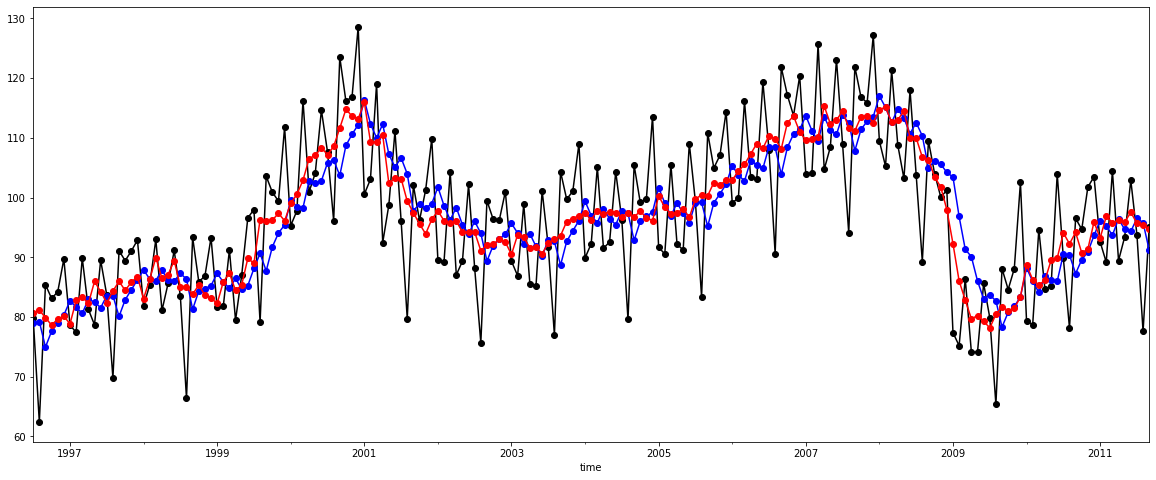

In [ ]:
ax = ts_new.plot(marker='o', color='black', figsize=(20,8))

fitted_new.plot(marker='o', ax=ax, color='blue')
fitted2.plot(marker='o', ax=ax, color='red')
plt.show()